## Lending club loan  Case Study
#### In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 understaning the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#add required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#show all rows details
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None

In [3]:
#load csv format data file 
loan= pd.read_csv("loan.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#show first five row data
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#show total no. of rows and cols
loan.shape


(39717, 111)

In [6]:
#Check the statical description of numarical data
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Feature selection


In [7]:
# finding null values of each coloum
missing_info=pd.DataFrame(loan.isnull().sum().sort_values()).reset_index()
#providing heading to columns
missing_info.rename(columns={'index':'col_name',0:'null_counts'},inplace=True)
missing_info.head()

,col_name,null_counts
0,id,0
1,earliest_cr_line,0
2,inq_last_6mths,0
3,open_acc,0
4,pub_rec,0


In [8]:
#no. of coluums
missing_info.shape

(111, 2)

In [9]:
#calculating missing percentage of ecah coloumn & importing in excel file
missing_info['miss_percent']=missing_info['null_counts']/loan.shape[0]*100
missing_info.to_excel('missing_data.xlsx')
missing_info

,col_name,null_counts,miss_percent
0,id,0,0.0
1,earliest_cr_line,0,0.0
2,inq_last_6mths,0,0.0
3,open_acc,0,0.0
4,pub_rec,0,0.0
...,...,...,...
106,avg_cur_bal,39717,100.0
107,bc_open_to_buy,39717,100.0
108,bc_util,39717,100.0
109,mo_sin_old_rev_tl_op,39717,100.0


## Imputation missing values
    - Dropping the rows containing the missing values
    - Imputing the missing values

In [10]:
#filter all coumns data missing more than 60 %  
miss_col=missing_info[missing_info['miss_percent']>=60]['col_name'].to_list()
miss_col

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'num_bc_sats',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'mo_sin_rcnt_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'verification_status_joint',
 'mo_sin_old_il_acct',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'total_bc_limit',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12

In [11]:
#and remove columns which data more than 60% missing
new_loan=loan.drop(labels=miss_col,axis=1)

In [12]:
#no. of columns after droping missing fields more than 60%
new_loan.shape

(39717, 54)

In [13]:
#show dataframe
new_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [14]:
new_loan.isnull().sum().sort_values()

id                                0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
delinq_2yrs                       0
total_pymnt_inv                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt                       0
total_rec_prncp                   0
dti                               0
earliest_cr_line                  0
zip_code                          0
int_rate                          0
installment                       0
grade                       

In [15]:
##checking each column to fix null values
new_loan.info()
#new_loan.groupby('last_credit_pull_d').size() #remove
#new_loan.groupby('title').size() #remove
#new_loan.groupby('tax_liens').size()  #remove
#new_loan.groupby('collections_12_mths_ex_med').size() #remove
#new_loan.groupby('chargeoff_within_12_mths').size() #remove
#new_loan.groupby('last_pymnt_d').size() #remove
#new_loan.groupby('pub_rec_bankruptcies').size()  #fill with mode
#new_loan.groupby('emp_length').size() #fill with mode mode
#new_loan.groupby('desc').size() #remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
#fill missing values of columns emp_length and pub_rec_bankruptcies with mode
print(new_loan.groupby('emp_length').size())
print(new_loan['emp_length'].mode())
new_loan['emp_length']=new_loan['emp_length'].fillna(new_loan['emp_length'].mode()[0])
print(new_loan.groupby('emp_length').size())

print(new_loan.groupby('pub_rec_bankruptcies').size())
print(new_loan['pub_rec_bankruptcies'].mode())
new_loan['pub_rec_bankruptcies']=new_loan['pub_rec_bankruptcies'].fillna(new_loan['pub_rec_bankruptcies'].mode()[0])
print(new_loan.groupby('pub_rec_bankruptcies').size())



emp_length
1 year       3240
10+ years    8879
2 years      4388
3 years      4095
4 years      3436
5 years      3282
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4583
dtype: int64
0    10+ years
dtype: object
emp_length
1 year       3240
10+ years    9954
2 years      4388
3 years      4095
4 years      3436
5 years      3282
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4583
dtype: int64
pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
dtype: int64
0    0.0
dtype: float64
pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
dtype: int64


In [17]:
#droping unrequired columns
new_loan=new_loan.drop(labels=['title','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths','desc','last_pymnt_d','emp_title'],axis=1)

In [18]:
#droping all NA rows values
new_loan=new_loan.dropna()


In [19]:
#print(new_loan['emp_length'].isnull().sum())
new_loan.isnull().sum().sort_values()

id                         0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
inq_last_6mths             0
total_pymnt_inv            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
last_credit_pull_d         0
policy_code                0
application_type           0
acc_now_delinq             0
total_rec_prncp            0
delinq_amnt                0
earliest_cr_line           0
dti                        0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
delinq_2yrs   

## Analyses Univariate and Bivariate Data with the help of graphs

<AxesSubplot:>

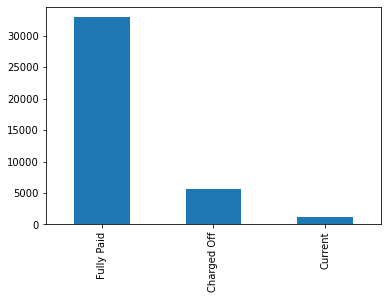

In [20]:
#finding loan status
new_loan.loan_status.value_counts().plot(kind='bar')

In [21]:
#droping current loan status
new_loan.drop(new_loan[new_loan['loan_status'] == 'Current'].index, inplace = True)


In [22]:
#checking drop rows
new_loan.shape


(38525, 47)

<AxesSubplot:ylabel='loan_status'>

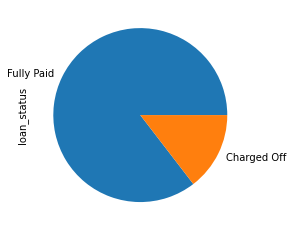

In [23]:
new_loan.loan_status.value_counts().plot(kind='pie')

<AxesSubplot:xlabel='home_ownership'>

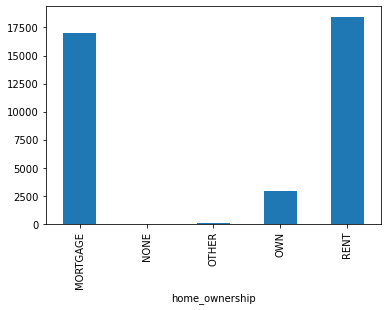

In [24]:
#checking home hownership status of each lenders - Univariate
new_loan.groupby('home_ownership')['loan_status'].count().plot(kind='bar')

#ratio of loan taken of rented and Mortgage is higher

### loan defaulter and Non-defaulter in seprate dataframe

In [25]:
#finding loan defaulter and Non-defaulter in seprate database
loanC=new_loan[new_loan['loan_status'] == 'Charged Off']
loanF=new_loan[new_loan['loan_status'] == 'Fully Paid']

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

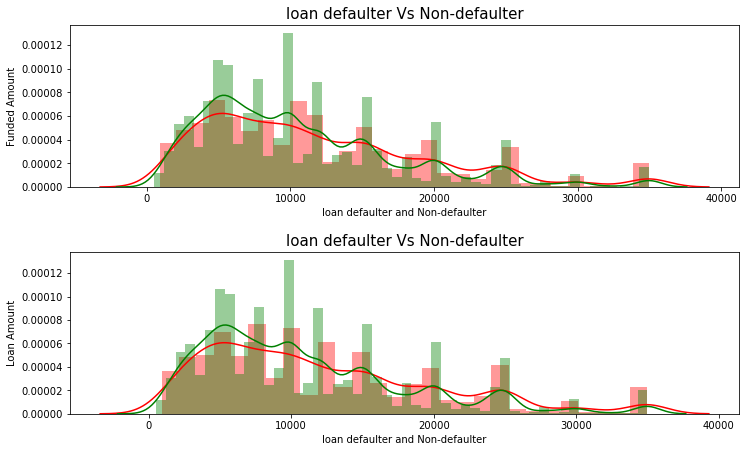

In [26]:
#graph for  loan defaulter and Non-defaulter -  Bivariate

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(loanC["funded_amnt"], ax=ax[0], 
             color="r")
g1 = sns.distplot(loanF["funded_amnt"], ax=ax[0], 
             color='g')
g1.set_title("loan defaulter Vs Non-defaulter", fontsize=15)
g1.set_ylabel("Funded Amount")
g1.set_xlabel("loan defaulter and Non-defaulter")


g2 = sns.distplot(loanC["loan_amnt"], ax=ax[1], 
             color="r")
g2 = sns.distplot(loanF["loan_amnt"], ax=ax[1], 
             color='g')
g2.set_title("loan defaulter Vs Non-defaulter", fontsize=15)
g2.set_ylabel("Loan Amount")
g2.set_xlabel("loan defaulter and Non-defaulter")

plt.show()

#Ratio of loan amount between 10000 to 20000 are more defaulter against Non-defaulter

{'whiskers': [<matplotlib.lines.Line2D at 0x1cca1b9b520>,
 'caps': [<matplotlib.lines.Line2D at 0x1cca1b9bbe0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cca1b9b1c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1cca1ba72e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cca1ba79a0>,
 'means': [<matplotlib.lines.Line2D at 0x1cca1ba7640>,
  <matplotlib.lines.Line2D at 0x1cca13a10a0>]}

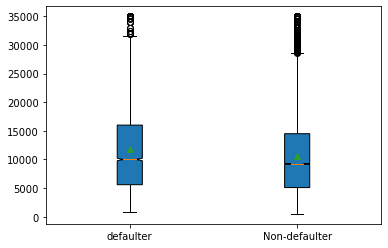

In [27]:
# Bivariate - box plot funded amount vs loan ddefaulter or non-defaulter
plt.boxplot([loanC["funded_amnt"],loanF["funded_amnt"]],patch_artist=True,notch=True,showmeans=True,labels=['defaulter','Non-defaulter'])

#higher amount of loan had more defaulter

Text(0, 0.5, 'No. of charged off')

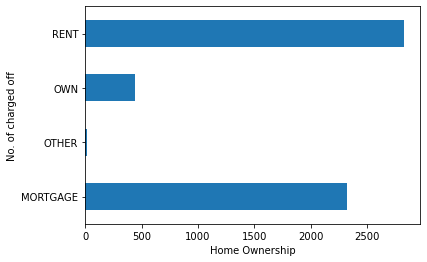

In [28]:
# Bivariate - barh chart -  defaulter vs home ownership status
loanC.groupby('home_ownership')['loan_status'].count().plot(kind='barh')
plt.xlabel("Home Ownership")
plt.ylabel("No. of charged off")
#ratio of charged off in rented and Mortgage is higher compare to own home

In [29]:
#make separate dataframe of important columns or fileds before loan aproval
imp_loan=new_loan.loc[:,['loan_status','home_ownership','funded_amnt','loan_amnt','term','emp_length','annual_inc','verification_status','loan_status']]
imp_loan

,loan_status,home_ownership,funded_amnt,loan_amnt,term,emp_length,annual_inc,verification_status,loan_status
0,Fully Paid,RENT,5000,5000,36 months,10+ years,24000.0,Verified,Fully Paid
1,Charged Off,RENT,2500,2500,60 months,< 1 year,30000.0,Source Verified,Charged Off
2,Fully Paid,RENT,2400,2400,36 months,10+ years,12252.0,Not Verified,Fully Paid
3,Fully Paid,RENT,10000,10000,36 months,10+ years,49200.0,Source Verified,Fully Paid
5,Fully Paid,RENT,5000,5000,36 months,3 years,36000.0,Source Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...
39712,Fully Paid,MORTGAGE,2500,2500,36 months,4 years,110000.0,Not Verified,Fully Paid
39713,Fully Paid,RENT,8500,8500,36 months,3 years,18000.0,Not Verified,Fully Paid
39714,Fully Paid,MORTGAGE,5000,5000,36 months,< 1 year,100000.0,Not Verified,Fully Paid
39715,Fully Paid,MORTGAGE,5000,5000,36 months,< 1 year,200000.0,Not Verified,Fully Paid


In [30]:
#findin correlation between numaric columns
imp_loan.corr()

,funded_amnt,loan_amnt,annual_inc
funded_amnt,1.000000,0.981765,0.264744
loan_amnt,0.981765,1.000000,0.268948
annual_inc,0.264744,0.268948,1.000000


In [31]:
#important field for EDA adn fields after loan aproval
imp_loan_after=new_loan.loc[:,['loan_status','home_ownership','funded_amnt','loan_amnt','term','emp_length','annual_inc','verification_status','loan_status','total_pymnt','total_rec_late_fee','recoveries','collection_recovery_fee','application_type']]

In [32]:
imp_loan_after.head()

,loan_status,home_ownership,funded_amnt,loan_amnt,term,emp_length,annual_inc,verification_status,loan_status,total_pymnt,total_rec_late_fee,recoveries,collection_recovery_fee,application_type
0,Fully Paid,RENT,5000,5000,36 months,10+ years,24000.0,Verified,Fully Paid,5863.155187,0.00,0.00,0.00,INDIVIDUAL
1,Charged Off,RENT,2500,2500,60 months,< 1 year,30000.0,Source Verified,Charged Off,1008.710000,0.00,117.08,1.11,INDIVIDUAL
2,Fully Paid,RENT,2400,2400,36 months,10+ years,12252.0,Not Verified,Fully Paid,3005.666844,0.00,0.00,0.00,INDIVIDUAL
3,Fully Paid,RENT,10000,10000,36 months,10+ years,49200.0,Source Verified,Fully Paid,12231.890000,16.97,0.00,0.00,INDIVIDUAL
5,Fully Paid,RENT,5000,5000,36 months,3 years,36000.0,Source Verified,Fully Paid,5632.210000,0.00,0.00,0.00,INDIVIDUAL


Text(0, 0.5, 'No. of charged off')

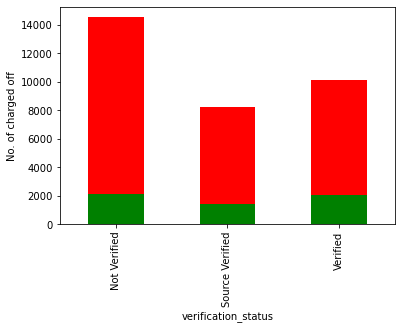

In [33]:
# Bivariate - barchart -  defaulter vs verification_status status
loanF.groupby('verification_status')['loan_status'].count().plot(kind='bar',color='r')
loanC.groupby('verification_status')['loan_status'].count().plot(kind='bar',color='g')
plt.xlabel("verification_status")
plt.ylabel("No. of charged off")
#ratio of defaulter in source verified is higher compare to other

Text(0, 0.5, 'No. of charged off')

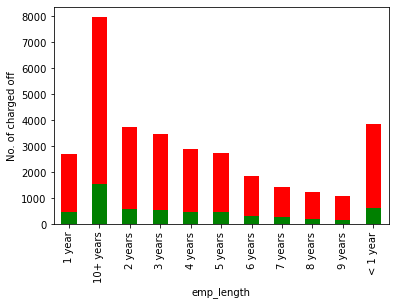

In [34]:
# Bivariate - barchart -  defaulter vs verification_status status
loanF.groupby('emp_length')['loan_status'].count().plot(kind='bar',color='r')
loanC.groupby('emp_length')['loan_status'].count().plot(kind='bar',color='g')
plt.xlabel("emp_length")
plt.ylabel("No. of charged off")
#ratio of  employee less than one year of job is more charged off compare to other employee

In [35]:
#finding correlation  to find relation between columns
imp_loan_after.corr()

,funded_amnt,loan_amnt,annual_inc,total_pymnt,total_rec_late_fee,recoveries,collection_recovery_fee
funded_amnt,1.000000,0.981765,0.264744,0.898658,0.049607,0.143509,0.078880
loan_amnt,0.981765,1.000000,0.268948,0.881834,0.047241,0.142849,0.077116
annual_inc,0.264744,0.268948,1.000000,0.256209,0.006953,0.022271,0.016120
total_pymnt,0.898658,0.881834,0.256209,1.000000,0.014403,0.029602,0.028509
total_rec_late_fee,0.049607,0.047241,0.006953,0.014403,1.000000,0.100967,0.094134
recoveries,0.143509,0.142849,0.022271,0.029602,0.100967,1.000000,0.796738
collection_recovery_fee,0.078880,0.077116,0.016120,0.028509,0.094134,0.796738,1.000000


<AxesSubplot:>

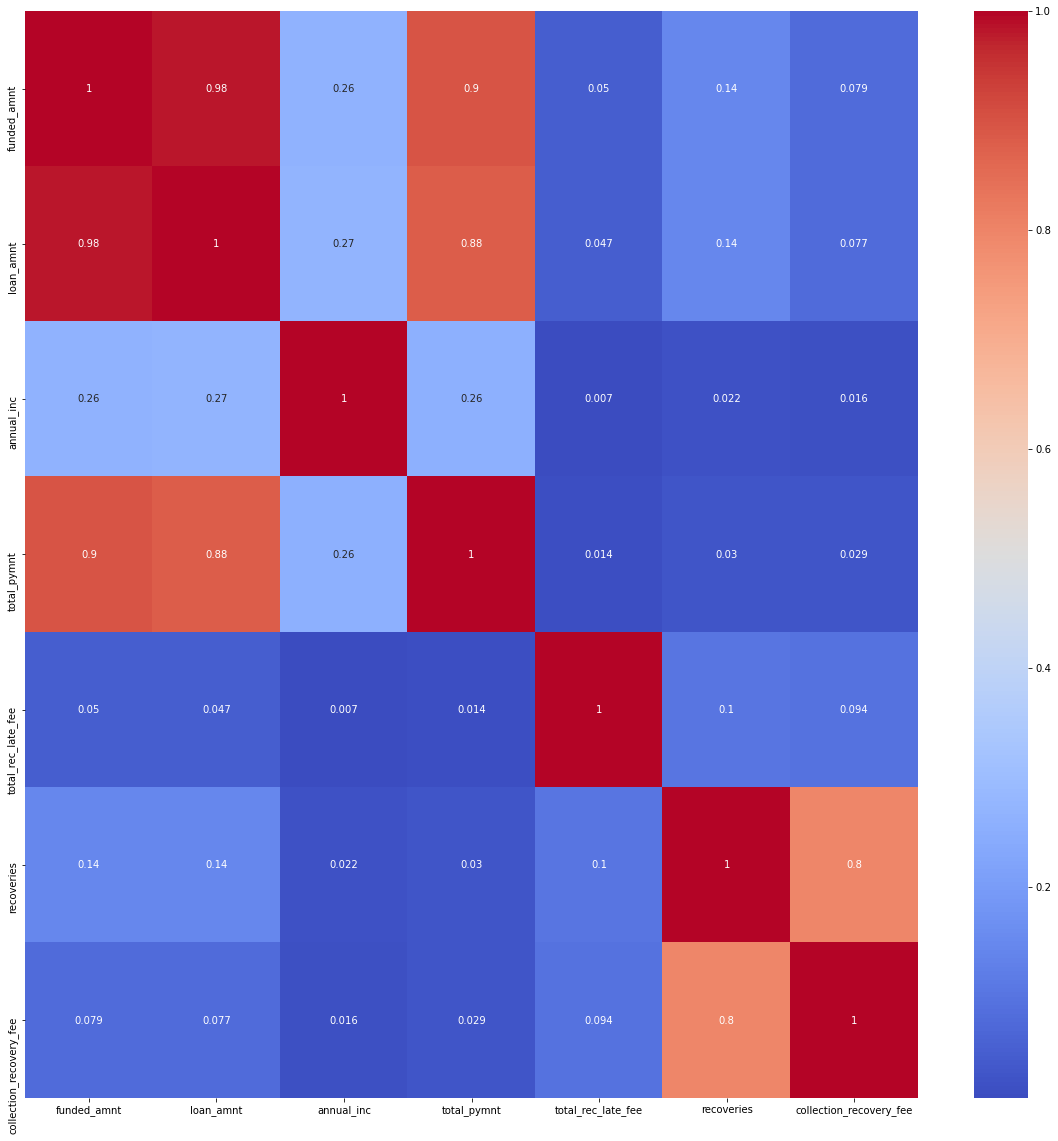

In [36]:
#finding correlation heatmap chart to find relation between columns
plt.figure(figsize=(20,20))
sns.heatmap(imp_loan_after.corr(),cmap='coolwarm',annot=True)

# there is correlation between amount funded, term and annual income is more  with each other

In [37]:
#counting loan term catogries 
imp_loan_after['term'].value_counts()

 36 months    29047
 60 months     9478
Name: term, dtype: int64

Text(0, 0.5, 'No. of charged off')

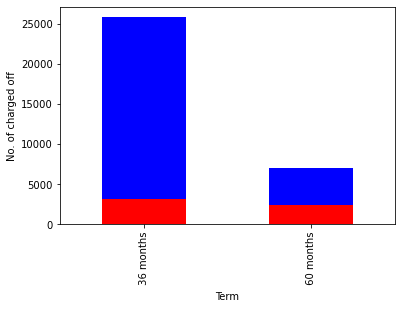

In [38]:
#bivariate analises for loan default vs term
loanF.groupby('term')['loan_status'].count().plot(kind='bar', color='b')
loanC.groupby('term')['loan_status'].count().plot(kind='bar',color='r')

plt.xlabel("Term")
plt.ylabel("No. of charged off")
#ratio of charged off in 60 months is higher than compare to 36 months

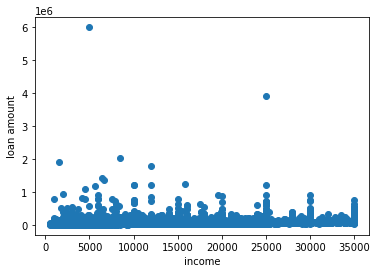

In [39]:
### loan amount vs annual income

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(imp_loan_after['loan_amnt'], imp_loan_after['annual_inc'])
plt.xlabel("income")
plt.ylabel("loan amount")
plt.show()

#low income had take more amount of loan

In [40]:
#?sns.pairplot

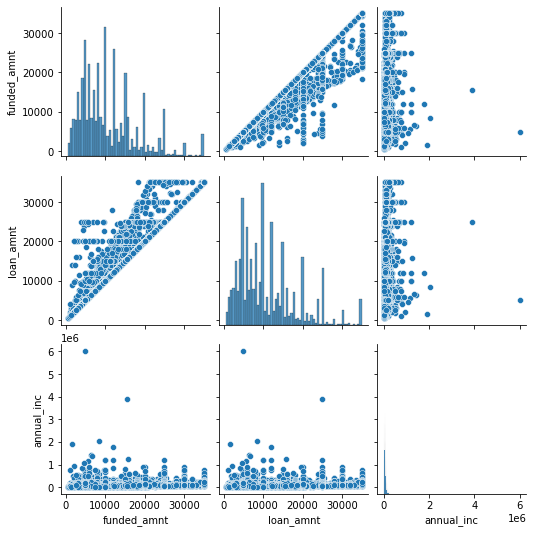

In [41]:
#pair plot
sns.pairplot((new_loan[['funded_amnt', 'loan_amnt', 'annual_inc']]))
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


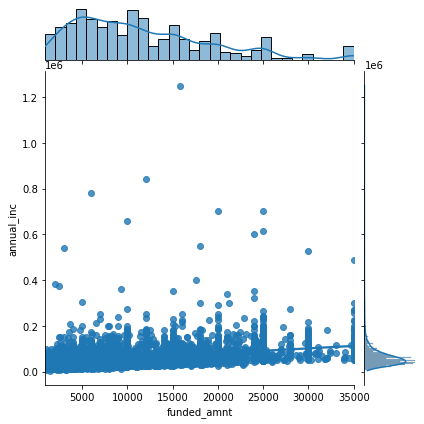

In [42]:
##Plot a reg plot for funded amount and annual income and observe the trend
sns.jointplot(loanC.funded_amnt, loanC.annual_inc, kind="reg")
plt.show()

#graph show annual income less than 2,00,000  and funded amount between 5,000 to 20,000 is more defaluter